---
title: 'Breaching 1.5°C: Give me the odds'
subtitle: 'Temperature anomalies notebook'
author:
  - name: J. Eduardo Vera-Valdés
    email: eduardo@math.aau.dk
    url: 'https://everval.github.io'
    affiliations:
      - name: Aalborg University
        department: Department of Mathematical Sciences
        country: Denmark
    orcid: 0000-0002-0337-8055
    corresponding: true
  - name: Olivia Kvist
    email: omtk@math.aau.dk
    affiliations:
      - name: Aalborg University
        department: Department of Mathematical Sciences
        country: Denmark
abstract: |
  This is a supplementary notebook for the paper "Breaching 1.5°C: Give me the odds" by J. Eduardo Vera-Valdés and Olivia Kvist. The notebook shows a plot comparing the different temperature anomalies datasets used in the paper.
format:
  html:
    mainfont: Georgia, serif
    html-math-method: katex
    theme: litera
    code-fold: true
    title-block-banner: "#eef7ee"
#  typst:
#    mainfont: Computer Modern
#    fontsize: 12pt
#    papersize: a4
execute:
  enabled: true
  cache: true
  freeze: auto
engine: julia
#jupyter: julia-1.11
bibliography: library.bib
---

## 0. Load Packages

In [1]:
#| label: load-packages
#| echo: false
#| output: false
#| warning: false
#| include: false

using Pkg
Pkg.activate(pwd())
using Plots, Dates, CSV, DataFrames, Statistics
include("TrendEstimators.jl")
using .TrendEstimators

theme(:ggplot2)

  Activating project at `~/Library/CloudStorage/OneDrive-AalborgUniversitet/Research/CLIMATE/Paris Goal/Odds-of-breaching-1.5C`


## 1. Load Data

### 1.1 Load HadCRUT Data

In [2]:
rawtemp_hadcrut = CSV.read("data/HadCRUT.5.0.2.0.analysis.ensemble_series.global.monthly.csv", DataFrame)
first(rawtemp_hadcrut, 5)

5×203 DataFrame
 Row │ Time        Fraction of area represented  Coverage uncertainty (1 sigma ⋯
     │ Date        Float64                       Float64                       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1850-01-01                      0.53036                        0.12529  ⋯
   2 │ 1850-02-01                      0.471513                       0.15873
   3 │ 1850-03-01                      0.443069                       0.146062
   4 │ 1850-04-01                      0.477059                       0.116737
   5 │ 1850-05-01                      0.487233                       0.095900 ⋯
                                                             201 columns omitted

Saving the mean of the ensemble to be used later.

In [3]:
menstemp_hadcrut = reduce(+, eachcol(rawtemp_hadcrut[:, 4:203])) ./ ncol(rawtemp_hadcrut[:, 4:203]);
temp_hadcrut = DataFrame("Dates" => rawtemp_hadcrut.Time, "Temperature" => menstemp_hadcrut[:]);
first(temp_hadcrut, 5)

5×2 DataFrame
 Row │ Dates       Temperature 
     │ Date        Float64     
─────┼─────────────────────────
   1 │ 1850-01-01    -0.674564
   2 │ 1850-02-01    -0.333416
   3 │ 1850-03-01    -0.591323
   4 │ 1850-04-01    -0.588721
   5 │ 1850-05-01    -0.508817

Baseline

In [4]:
oldbase_hadcrut = mean(temp_hadcrut.Temperature[(temp_hadcrut.Dates.>=Date(1850, 1, 1)).&(temp_hadcrut.Dates.<Date(1900, 1, 1))]);
temp_hadcrut.Temperature = temp_hadcrut.Temperature .- oldbase_hadcrut;
first(temp_hadcrut, 5) 

5×2 DataFrame
 Row │ Dates       Temperature 
     │ Date        Float64     
─────┼─────────────────────────
   1 │ 1850-01-01   -0.31563
   2 │ 1850-02-01    0.0255188
   3 │ 1850-03-01   -0.232388
   4 │ 1850-04-01   -0.229786
   5 │ 1850-05-01   -0.149882

### 1.2 GISTEMP Data

In [5]:
widetemp = CSV.read("data/GLB.Ts+dSST.csv", DataFrame)
rawtemp_gistemp = TrendEstimators.longseries(widetemp)
T = size(rawtemp_gistemp, 1);
dates = collect(Date(1880, 1, 1):Month(1):(Date(1880, 1, 1)+Dates.Month(T - 1)));
temp_gistemp = DataFrame("Dates" => dates, "Temperature" => rawtemp_gistemp[:]);
first(temp_gistemp, 5)

5×2 DataFrame
 Row │ Dates       Temperature 
     │ Date        Float64     
─────┼─────────────────────────
   1 │ 1880-01-01        -0.2
   2 │ 1880-02-01        -0.26
   3 │ 1880-03-01        -0.09
   4 │ 1880-04-01        -0.17
   5 │ 1880-05-01        -0.1

Baseline

In [6]:
oldbase_gistemp = mean(temp_gistemp.Temperature[(temp_gistemp.Dates.>=Date(1850, 1, 1)).&(temp_gistemp.Dates.<Date(1901, 1, 1))]);
temp_gistemp.Temperature = temp_gistemp.Temperature .- oldbase_gistemp;

### 1.3 Berkeley Data

In [7]:
rawtemp_berkeley = CSV.read("data/BerkeleyEarth.csv", DataFrame)
T = size(rawtemp_berkeley, 1);
dates = collect(Date(1850, 1, 1):Month(1):(Date(1850, 1, 1)+Dates.Month(T - 1)));
rawtemp_berkeley = DataFrame("Dates" => dates, "Temperature" => rawtemp_berkeley[!, 3]);

Baseline

In [8]:
oldbase_berkeley = mean(rawtemp_berkeley.Temperature[(rawtemp_berkeley.Dates.>=Date(1850, 1, 1)).&(rawtemp_berkeley.Dates.<Date(1900, 1, 1))]);
temp_berkeley = DataFrame("Dates" => dates, "Temperature" => rawtemp_berkeley.Temperature .- oldbase_berkeley);

### 1.4 NOAA Data

In [9]:
rawtemp_noaa = CSV.read("data/NOAA.csv", DataFrame)
T = size(rawtemp_noaa, 1);
dates = collect(Date(1850, 1, 1):Month(1):(Date(1850, 1, 1)+Dates.Month(T - 1)));
temp_noaa = DataFrame("Dates" => dates, "Temperature" => rawtemp_noaa[!, 3]);

Baseline

In [10]:
oldbase_noaa = mean(temp_noaa.Temperature[(temp_noaa.Dates.>=Date(1850, 1, 1)).&(temp_noaa.Dates.<Date(1900, 1, 1))]);
temp_noaa.Temperature = temp_noaa.Temperature .- oldbase_noaa;
last(temp_noaa, 5)

5×2 DataFrame
 Row │ Dates       Temperature 
     │ Date        Float64     
─────┼─────────────────────────
   1 │ 2024-04-01      1.34532
   2 │ 2024-05-01      1.39105
   3 │ 2024-06-01      1.39492
   4 │ 2024-07-01      1.44785
   5 │ 2024-08-01      1.45617

### Plots

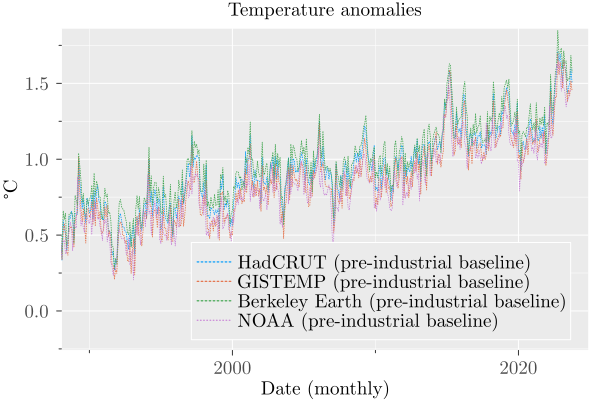

In [11]:
#| label: fig-all-temp
#| fig-cap: "Temperature anomalies (°C) in the HadCRUT5 [@HadCRUT5], GISTEMP [@GISTEMPTeam2020], Berkeley Earth [@BerkeleyEarth], and NOAAGlobalTemp [@NOAA] datasets. All datasets are presented with the pre-industrial baseline period (Before 1900)."

plot(temp_hadcrut.Dates, temp_hadcrut.Temperature, label="HadCRUT (pre-industrial baseline)", xlabel="Date (monthly)", ylabel="°C", linewidth=0.8, linestyle= :dot, xticks=(temp_hadcrut.Dates[372:240:end], Dates.format.(temp_hadcrut.Dates[372:240:end], "Y")), title="Temperature anomalies", color=1)
plot!(temp_gistemp.Dates, temp_gistemp.Temperature, label="GISTEMP (pre-industrial baseline)", linewidth=0.8, linestyle= :dot, color=2)
plot!(temp_berkeley.Dates, temp_berkeley.Temperature, label="Berkeley Earth (pre-industrial baseline)", linewidth=0.8, linestyle= :dot, color=3, xlims=(Date(1990, 1, 1), Date(2024, 10, 1)))
plot!(temp_noaa.Dates, temp_noaa.Temperature, label="NOAA (pre-industrial baseline)", linewidth=0.7, linestyle= :dot, color=4, ylims=(-0.2, 1.8))
plot!(fontfamily="Computer Modern", legendfontsize=12, tickfontsize=12, titlefontfamily="Computer Modern", legendfontfamily="Computer Modern", tickfontfamily="Computer Modern", ylabelfontsize=12, xlabelfontsize=12, titlefontsize=12, legend=:bottomright)

In [12]:
savefig("figures/Temperature-Anomalies-All-Datasets.png")

"/Users/jeddy/Library/CloudStorage/OneDrive-AalborgUniversitet/Research/CLIMATE/Paris Goal/Odds-of-breaching-1.5C/figures/Temperature-Anomalies-All-Datasets.png"

In [13]:

[ last(temp_hadcrut.Temperature, 5), last(temp_gistemp.Temperature, 5), last(temp_berkeley.Temperature, 5), last(temp_noaa.Temperature, 5) ]

4-element Vector{Vector{Float64}}:
 [1.4334640716722102, 1.4743430876722106, 1.4969345246722099, 1.5985191671722112, 1.4999801771722105]
 [1.3774603174603173, 1.4574603174603173, 1.4174603174603173, 1.5174603174603174, 1.4474603174603173]
 [1.513775, 1.531775, 1.530775, 1.683775, 1.573775]
 [1.3453185816666666, 1.3910525816666666, 1.3949165816666667, 1.4478515816666666, 1.4561725816666666]

## Probability paths

In [14]:
paths_hadcrut = CSV.read("tables/ProbabilityPathsHadCRUT5-Extensive.csv", DataFrame);
paths_gistemp = CSV.read("tables/ProbabilityPathsGISTEMP-Extensive.csv", DataFrame);
paths_berkeley = CSV.read("tables/ProbabilityPathsBerkeley-Extensive.csv", DataFrame);
paths_noaa = CSV.read("tables/ProbabilityPathsNOAA_breakmodel-Extensive.csv", DataFrame);

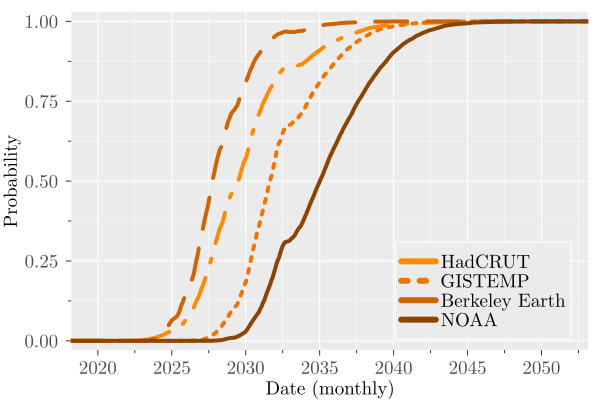

In [15]:
#| label: fig-all-data-prob
#| fig-cap: "Probability of exceeding the 1.5°C threshold in the HadCRUT5 [@HadCRUT5], GISTEMP [@GISTEMPTeam2020], Berkeley Earth [@BerkeleyEarth], and NOAAGlobalTemp [@NOAA] datasets."

plot(paths_hadcrut."Date (month)", [paths_hadcrut."1.5°C Threshold"], label="HadCRUT", xlabel="Date (monthly)", ylabel="Probability", linewidth=4, linestyle= :dashdot, title="", color=:darkorange)
plot!(paths_gistemp."Date (month)", [paths_gistemp."1.5°C Threshold"], label="GISTEMP", linewidth=4, linestyle= :dot, color=:darkorange2)
plot!(paths_berkeley."Date (month)", [paths_berkeley."1.5°C Threshold"], label="Berkeley Earth", linewidth=4, linestyle= :dash, color=:darkorange3)
plot!(paths_noaa."Date (month)", [paths_noaa."1.5°C Threshold"], label="NOAA", linewidth=4, linestyle= :solid, color=:darkorange4)
plot!(xlims= (Date(2020, 1, 1), Date(2053, 1, 1)), ylims=(0, 1), xticks=(paths_hadcrut."Date (month)"[168:60:end-336], Dates.format.(paths_hadcrut."Date (month)"[168:60:end-336], "Y")), fontfamily="Computer Modern", legendfontsize=12, tickfontsize=12, titlefontfamily="Computer Modern", legendfontfamily="Computer Modern", tickfontfamily="Computer Modern", ylabelfontsize=12, xlabelfontsize=12, titlefontsize=12, legend=:bottomright)

In [16]:
savefig("figures/Coverage-All-Datasets.png")

"/Users/jeddy/Library/CloudStorage/OneDrive-AalborgUniversitet/Research/CLIMATE/Paris Goal/Odds-of-breaching-1.5C/figures/Coverage-All-Datasets.png"